In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [9]:
df = pd.read_csv('salarios.csv')
df.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [10]:
paises = ['MX','US', 'BR','AR','CO', 'CA']
df['Paises'] = [paises[np.random.randint(0,len(paises))] for i in range(30)]   #Aleatorio de paises
df['idPaises'] = pd.factorize(df['Paises'])[0]  # Categoriza los paises aleatorios
df.head(10)

,Aexperiencia,Salario,Paises,idPaises
0,10.0,42500,AR,0
1,8.0,36302,US,1
2,5.4,35000,CA,2
3,2.5,18103,BR,3
4,1.0,15000,CA,2
5,8.0,37000,MX,4
6,4.0,26300,BR,3
7,6.0,35201,CO,5
8,2.0,18302,MX,4
9,10.0,42000,US,1


In [11]:
df.shape

(30, 4)

In [12]:
y = df['Salario']
X = df[['Aexperiencia','idPaises']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  
#test_size: dividir datos (0.2 quieres decir que estamos asignando el 80% de entrenamiento)
#Debe ser (70% u 80% de Entrenamiento y el restante con el que se va a validar el modelo )
#Random_state: si vamos a tener que modificar esos datos, en 0 se queda igual

In [14]:
X_train.head()

,Aexperiencia,idPaises
22,5.3,1
5,8.0,4
16,3.0,0
8,2.0,4
14,2.0,5


In [15]:
y_train.head()

22    27900
5     37000
16    19000
8     18302
14    17000
Name: Salario, dtype: int64

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.8233444356099188

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

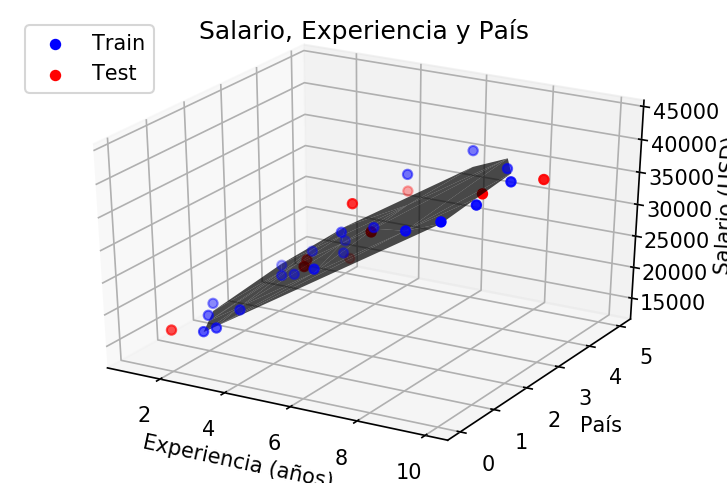

In [24]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Aexperiencia'], X_train['idPaises'], y_train, color = 'blue', label = 'Train')
ax.scatter(X_test['Aexperiencia'], X_test['idPaises'], y_test, color = 'red', label = 'Test')
ax.plot_trisurf(X_train['Aexperiencia'],X_train['idPaises'], regressor.predict(X_train),color = 'black', alpha = 0.7)
ax.set_title('Salario, Experiencia y País')
ax.set_xlabel('Experiencia (años)')
ax.set_ylabel('País')
ax.set_zlabel('Salario (USD)')
plt.legend(loc="upper left") 
#ax.autoscale()
fig.show